> Importante: Para las siguientes, tareas el fichero de datos se cargará en Google Colab y se utilizará
Dask para conseguir los resultados solicitados

# Analisis de los datos de 

In [63]:
%pip install dask-ml

Note: you may need to restart the kernel to use updated packages.


In [64]:
import dask_ml.preprocessing as dpp
import dask.dataframe as dd

In [65]:
le = dpp.LabelEncoder()
df = dd.read_csv('data/air_traffic_data.csv')
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [66]:
col_obj = list(df.select_dtypes(include=['object']).columns)
col_obj.remove("Operating Airline")
col_obj.remove("Published Airline")
col_obj.remove("GEO Region")

In [67]:
df.drop_duplicates(subset=col_obj, inplace=True)
df.dropna()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
npartitions=1,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,int64,object,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [68]:
df[df.isnull().sum().compute() > 0]

c:\Users\mglez\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\core.py:4844: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
npartitions=1,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,int64,object,int64,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [69]:
for i in col_obj:
    df[i] = df[i].astype(str)

In [70]:
for i in col_obj:
    print(i)

Operating Airline IATA Code
Published Airline IATA Code
GEO Summary
Activity Type Code
Price Category Code
Terminal
Boarding Area
Adjusted Activity Type Code
Month


In [71]:
for i in col_obj:
    le.fit(df[i])
    df[i] = le.fit_transform(df[i])

In [72]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,60,ATA Airlines,54,0,US,0,0,2,1,27271,0,27271,2005,5
1,200507,ATA Airlines,60,ATA Airlines,54,0,US,1,0,2,1,29131,1,29131,2005,5
2,200507,ATA Airlines,60,ATA Airlines,54,0,US,2,0,2,1,5415,2,10830,2005,5
3,200507,Air Canada,6,Air Canada,6,1,Canada,0,1,2,1,35156,0,35156,2005,5
4,200507,Air Canada,6,Air Canada,6,1,Canada,1,1,2,1,34090,1,34090,2005,5


In [73]:
import seaborn as sns

<AxesSubplot:>

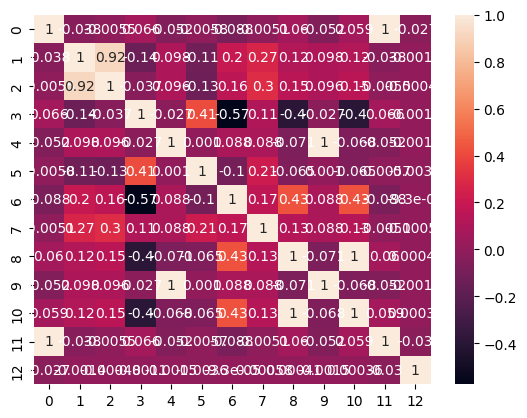

In [74]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Adjusted Passenger Count', ylabel='Count'>

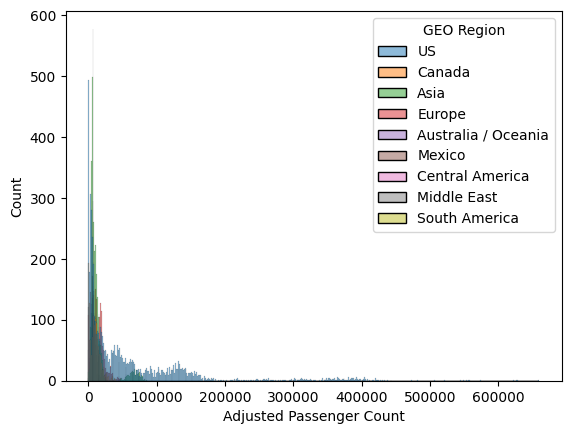

In [86]:
sns.histplot(data=df, x="Adjusted Passenger Count", hue="GEO Region")

In [88]:
df.groupby("GEO Region")["Adjusted Passenger Count"].mean().compute().sort_values(ascending=False)

GEO Region
US                     58485.878385
Asia                   13508.552704
Europe                 12779.055050
Canada                  9803.791255
Middle East             8658.612150
Mexico                  7250.898655
Australia / Oceania     6495.104478
Central America         4946.715328
South America           2786.011111
Name: Adjusted Passenger Count, dtype: float64

Por lo que podemos ver hay notablemente más pasageros cuya GEO Region es Estados Unidos